In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import nltk

import spacy
import csv
from collections import defaultdict

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [19]:
cwd =  os.getcwd()

In [20]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [75]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [5]:
X.info()

NameError: name 'X' is not defined

In [22]:
X.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,route_encoded,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,1,0,1,5.52,0,1,0,0,0,1


In [23]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [24]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [25]:
on_internet = df.sales_channel.value_counts().values[0] / df.sales_channel.count() * 100
on_mobile = df.sales_channel.value_counts().values[1] / df.sales_channel.count() * 100


In [26]:
print (on_internet)
print (on_mobile)

88.764
11.236


In [27]:
trip_type_percentages = df['trip_type'].value_counts() / len(df) * 100
print(trip_type_percentages)

RoundTrip     98.994
OneWay         0.774
CircleTrip     0.232
Name: trip_type, dtype: float64


<Axes: xlabel='purchase_lead', ylabel='Count'>

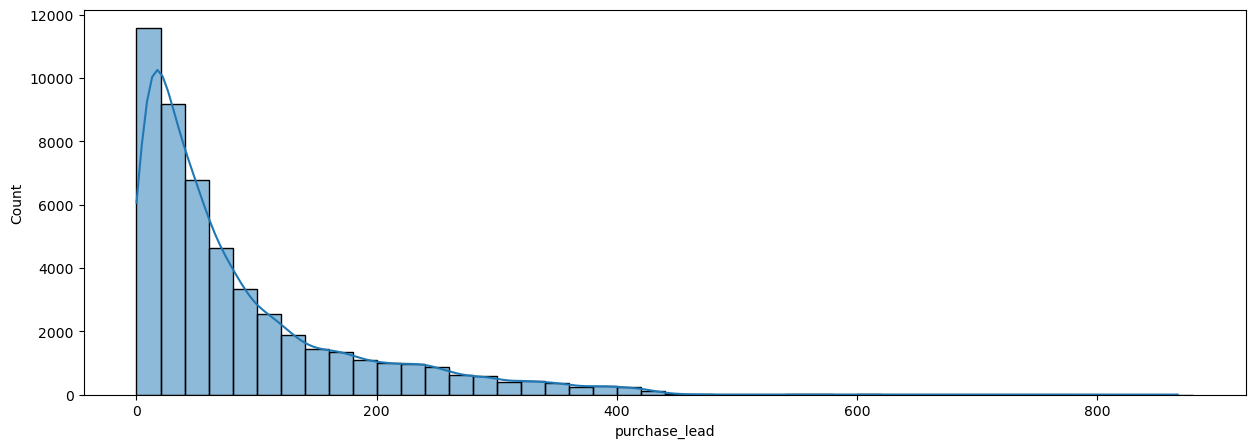

In [28]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="purchase_lead", binwidth=20, kde=True)

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Select only the numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the values of numeric columns
df_normalized = df.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])



In [30]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [31]:
print(df_normalized)

       num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               0.125      Internet  RoundTrip       0.302191        0.024422   
1               0.000      Internet  RoundTrip       0.129181        0.025707   
2               0.125      Internet  RoundTrip       0.280277        0.028278   
3               0.000      Internet  RoundTrip       0.110727        0.039846   
4               0.125      Internet  RoundTrip       0.078431        0.028278   
...               ...           ...        ...            ...             ...   
49995           0.125      Internet  RoundTrip       0.031142        0.007712   
49996           0.000      Internet  RoundTrip       0.128028        0.007712   
49997           0.000      Internet  RoundTrip       0.027682        0.007712   
49998           0.000      Internet  RoundTrip       0.017301        0.007712   
49999           0.000      Internet  RoundTrip       0.021915        0.007712   

       flight_hour flight_d

In [32]:
correlation_matrix = df_normalized.corr()
print(correlation_matrix)


                       num_passengers  purchase_lead  length_of_stay  \
num_passengers               1.000000       0.212606       -0.115850   
purchase_lead                0.212606       1.000000       -0.076560   
length_of_stay              -0.115850      -0.076560        1.000000   
flight_hour                  0.015607       0.035973       -0.024872   
wants_extra_baggage          0.120404      -0.022207        0.176757   
wants_preferred_seat         0.028544      -0.004499        0.032264   
wants_in_flight_meals        0.022943      -0.022653        0.098828   
flight_duration             -0.063169       0.067866        0.141181   
booking_complete             0.024116      -0.022131       -0.042408   

                       flight_hour  wants_extra_baggage  wants_preferred_seat  \
num_passengers            0.015607             0.120404              0.028544   
purchase_lead             0.035973            -0.022207             -0.004499   
length_of_stay           -0.024872  

C:\Users\pahar\AppData\Local\Temp\ipykernel_8084\1156220133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_normalized.corr()


C:\Users\pahar\AppData\Local\Temp\ipykernel_8084\4114759620.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_normalized.corr()


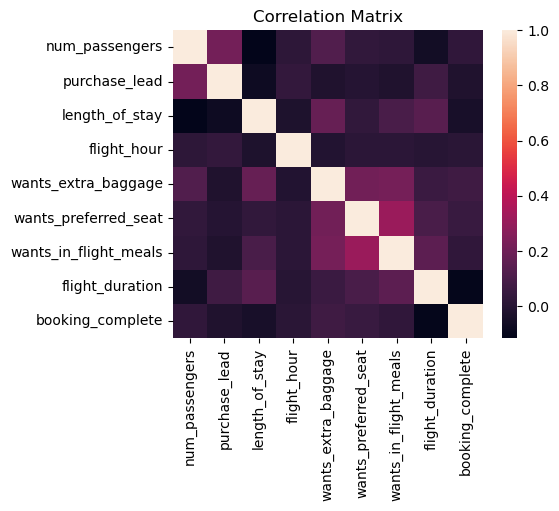

In [34]:
correlation_matrix = df_normalized.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

In [91]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and target variable
X = df_normalized.drop('booking_complete', axis=1)  # Features
y = df_normalized['booking_complete']  # Target variable

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.50      0.10      0.16      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.54      0.54     10000
weighted avg       0.81      0.85      0.81     10000



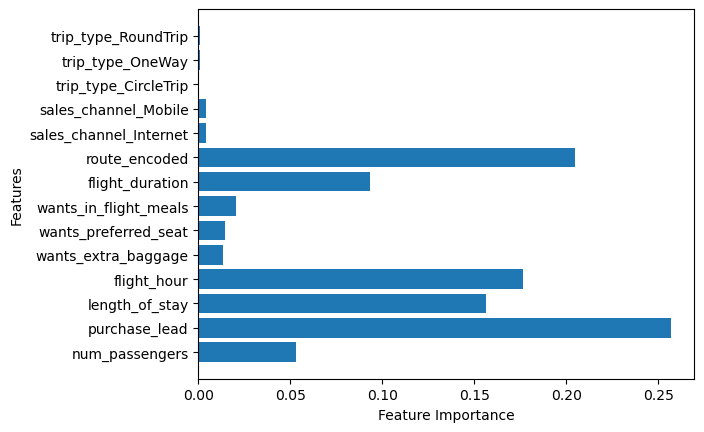

In [12]:
# Load the dataset
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

# Prepare the data
# Drop unnecessary columns
df = df.drop(["booking_origin", "flight_day"], axis=1)

# Label encode the "route" column
label_encoder = LabelEncoder()
df["route_encoded"] = label_encoder.fit_transform(df["route"])

# Convert categorical variables to numerical representations
df = pd.get_dummies(df, columns=["sales_channel", "trip_type"])

# Split the data into X and y
X = df.drop(["booking_complete", "route"], axis=1)
y = df["booking_complete"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualize feature importance
feature_importance = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

def fit_model(X_train, y_train):
    # Create and fit the model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

def predict_values(model, X_test):
    # Make predictions using the trained model
    y_pred = model.predict(X_test)
    return y_pred

def evaluate_model(y_test, y_pred):
    # Calculate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Calculate and print other evaluation metrics if needed
    # Example: Accuracy, Precision, Recall, F1-score
    accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
    print("Accuracy:", accuracy)
    precision = cm[1,1] / (cm[1,1] + cm[0,1])
    print("Precision:", precision)
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    print("Recall:", recall)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print("F1-score:", f1_score)

# Split the normalized dataset into features (X) and target variable (y)
X = df_normalized.drop('booking_complete', axis=1)  # Replace 'target_variable' with the name of your target variable column
y = df_normalized['booking_complete']  # Replace 'target_variable' with the name of your target variable column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = fit_model(X_train, y_train)

# Make predictions
y_pred = predict_values(model, X_test)

# Evaluate the model
evaluate_model(y_test, y_pred)


ValueError: could not convert string to float: 'Mobile'